This creates the underlying scatterplot data for the output neurons

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

In [118]:
# num data points
n = 20

def plot_decision_boundary(clf):
    # Generate a mesh grid of points to plot the decision boundary for clf
    h = 0.02
    x_min, x_max = dataset['x'].min() - 1, dataset['x'].max() + 1
    y_min, y_max = dataset['y'].min() - 1, dataset['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the dataset and the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(dataset['x'], dataset['y'], s=85, c=dataset['label'], cmap=plt.cm.RdBu, edgecolor='white')
    plt.title('Perceptron')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [246]:
# Create dataset that is mostly linearly separable between two classes
np.random.seed(42)
x1 = np.random.normal(loc=2, scale=3, size=(10, 2))
x2 = np.random.normal(loc=5, scale=1.5, size=(10, 2))
x3 = np.random.normal(loc=2, scale=1.5, size=(10, 2))
x4 = np.random.normal(loc=9, scale=1.5, size=(10, 2))
X = np.concatenate([x1, x2, x3, x4])
y = np.concatenate([np.zeros(20), np.ones(20)])
dataset = {'x': X[:, 0], 'y': X[:, 1], 'label': y}

## Linear Regression

In [247]:
df = pd.DataFrame(dataset)
df.to_json('scatterData.json', orient='records')

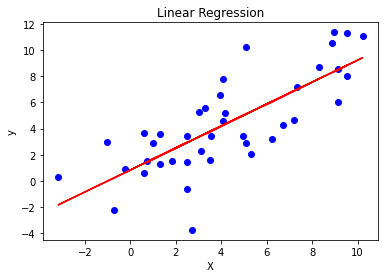

In [204]:
# Train a linear regression model on the dataset
reg = LinearRegression().fit(dataset['x'].reshape(-1,1), dataset['y'])

# Generate predictions using the trained model
y_pred = reg.predict(dataset['x'].reshape(-1,1))

# Plot the dataset and the prediction line
plt.scatter(dataset['x'], dataset['y'], color='blue')
plt.plot(dataset['x'], y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Logistic Regression

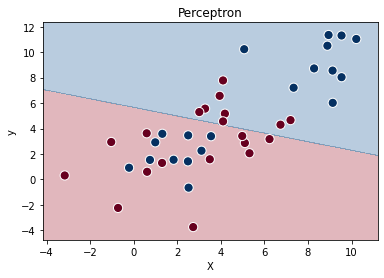

In [251]:
# Train a logistic regression model on the dataset
clf = LogisticRegression().fit(X, y)

plot_decision_boundary(clf)

In [252]:
clf.intercept_

array([-1.03096821])

In [249]:
w0 = clf.intercept_
w1, w2 = clf.coef_.squeeze()
print(w0, w1, w2)

[-1.03096821] 0.06139381579344726 0.18226813605883252


In [227]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# create a toy dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 1])

# fit the logistic regression model
clf = Perceptron().fit(X, y)

# get the weights from the clf object
w0 = clf.intercept_
w1, w2 = clf.coef_.squeeze()

# predict the label for a new point [x, y]
x, y = 7, 8
z = w0 + w1*x + w2*y
p = 1 / (1 + np.exp(-z))
predicted_label = 1 if p >= 0.5 else 0

print(predicted_label) # output: 1

1


In [228]:
print(w0, w1, w2)

[-6.] 6.0 0.0


## Perceptron

weights [[ 9.8093627  11.37731165]]
bias [-17.]


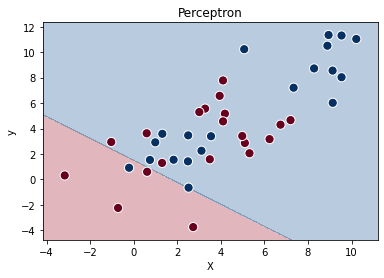

In [237]:
# Train a perceptron model on the dataset
clf = Perceptron().fit(X, y)

weights = clf.coef_
bias = clf.intercept_
print('weights', weights)
print('bias', bias)
plot_decision_boundary(clf)

In [244]:
9.8 * -3 + 2 * 11.3 - 17

-23.8

In [233]:
import numpy as np
from sklearn.linear_model import Perceptron

# create a toy dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 1])

# fit the perceptron model
clf = Perceptron().fit(X, y)

# extract the weights and bias term
weights = clf.coef_
bias = clf.intercept_

# predict the label for a new point [x, y]
new_point = np.array([[7, 8]])
z = np.dot(new_point, weights.T) + bias
print('z', z)
predicted_label = np.sign(z)

print(predicted_label) 

z [[36.]]
[[1.]]


In [232]:
6 * 7 + 0 * 8 + bias

array([36.])

## 2-layer Neural Network

In [253]:
# Train a neural network model with two hidden layers (each a perceptron) on the dataset
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='step', solver='sgd', max_iter=10000).fit(X, y)

plot_decision_boundary(clf)

ValueError: The activation 'step' is not supported. Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

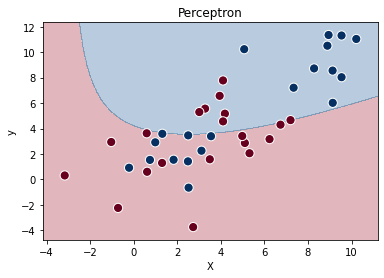

In [208]:
# Train a neural network model with two hidden layers (each a perceptron) on the dataset
clf = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', max_iter=20000).fit(X, y)

plot_decision_boundary(clf)